<a href="https://colab.research.google.com/github/GiuniorCandido/PTC-3569_Intro_ML/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Um neuronio j recebe entradas de 4 outros neuronios cujos niveis de ativação(v) são: 10,-20, 4 e -2. Os pesos respectivos do neuronio j são: 0.8,0.2,-1.0 e 0.9.

Considere viés nulo.



a) Represente um gráfico de fluxo de sinais com os dados acima.

In [0]:
from google.colab import files
from IPython.display import Image

In [9]:
uploaded = files.upload()

Saving ex3.png to ex3 (2).png


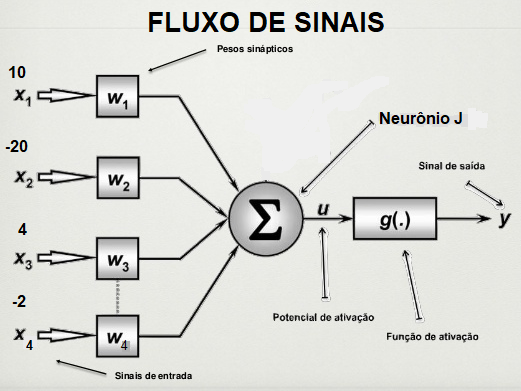

In [10]:
Image('ex3 (2).png')

In [17]:
import numpy as np
v = np.array([10,-20, 4, -2]) #coluna
w= np.array([0.8,0.2,-1.0, 0.9]) #linha
y= np.sum(np.dot(w, np.transpose(v)))
print('Considerando neurônio linear: ', y)

Considerando neuronio linear -1.8


b.2) O neuronio é representado por um modelo de McCulloch-Pitts


In [21]:
# vamos estabelecer o limiar(threshold); threshold = 0
 threshold = 0
y = (np.sum(w*v) > threshold).astype(int)
print("Considerando um modelo de McCulloch-Pitts, a saída do neurônio é: ", y)

Considerando um modelo de McCulloch-Pitts, a saída do neurônio é:  0


2.Repita o ex1  para um modelo de neuronio que utiliza função de ativação sigmoidal:

sigma(v) = 1/[1+exp(-v)]

In [25]:
# Questão 2
v = np.sum(w*v) + threshold            # Calculando o potencial do neurônio
y= 1/(1 + np.exp(-v))                  # Função Sigmoide
print("Considerando um modelo sigmoide, a saída do neurônio é:  ", y)

Considerando um modelo sigmoide, a saída do neurônio é:   0.21211893737515994


3.Escreva um programa para implementar o algoritmo Perceptron (Rosenblatt) 

a) Começando com w=0, aplique o programa aos dados de treinamento para as classes w1 e w2. Anote o número de iterações para convergência.

b) Aplique  o programa para w3 e w2. De novo anote o número de iterações para convergência

c) Explique a diferença de iterações exigidas em ambos os casos.

Conjunto de Dados


In [0]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# samples and classes omega 1,2 e 3:
w1 = np.array([[ 0.1, 1.1],
               [ 6.8, 7.1],
               [-3.5,-4.1],
               [ 2.0, 2.7],
               [ 4.1, 2.8],
               [ 3.1, 5.0],
               [-0.8,-1.3],
               [ 0.9, 1.2],
               [ 5.0, 6.4],
               [ 3.9, 4.0]])

w2 = np.array([[ 7.1, 4.2],
               [-1.4,-4.3],
               [ 4.5, 0.0],
               [ 6.3, 1.6],
               [ 4.2, 1.9],
               [ 1.4,-3.2],
               [ 2.4,-4.0],
               [ 2.5,-6.1],
               [ 8.4, 3.7],
               [ 4.1,-2.2]])

w3 = np.array([[-3.0,-2.9],
               [ 0.5, 8.7],
               [ 2.9, 2.1],
               [-0.1, 5.2],
               [-4.0, 2.2],
               [-1.3, 3.7],
               [-3.4, 6.2],
               [-4.1, 3.4],
               [-5.3, 1.6],
               [ 1.9, 5.1]])


Implementação da Sthocastic Gradient Descent:

Finalmente, podemos codificar algoritmo SGD usando nossa regra de atualização. Para simplificar, iremos fazer um loop linear sobre o conjunto de amostras. Para conjuntos de dados maiores, faz sentido escolher aleatoriamente uma amostra durante cada iteração no loop for.

In [0]:
def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0])) #Inicialize o vetor de peso para o perceptron com zeros
    eta = 1  # Defina a taxa de aprendizado como 1
    epochs = 10   #uma época refere-se a um ciclo no conjunto de dados de treinamento completo

    for epoch in range(epochs): #Repita n vezes em todo o conjunto de dados
        for i, x in enumerate(X):# Iterar sobre cada amostra no conjunto de dados
            if (np.dot(X[i], w)*Y[i]) <= 0: #Condição de classificação incorreta yi⟨xi, w⟩ ≤ 0
                w = w + eta*X[i]*Y[i] #Regra de atualização para os pesos w = w + yi xi, incluindo a taxa de aprendizado
    return w

Aprendizado: Perceptron!!

Em seguida, pode-se executar o código e verificar quantas iterações são necessárias, até que todas as amostras sejam classificadas corretamente. 

Para ver o progresso do aprendizado do perceptron, adiciona-se um recurso de plotagem ao algoritmo, contando o erro total em cada época.

In [0]:
def perceptron_sgd_plot(X, Y):
    '''
    treinar perceptron e plotar a perda total em cada época.
    
    : param X: amostras de dados
    : param Y: rótulos de dados
    : return: vetor de peso como uma matriz numpy
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w


item a)

array([  7. , -11.6])

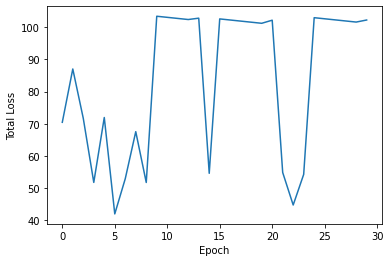

In [4]:
X = np.concatenate([w1, w2])                        # Criando conjunto de treino
y = np.concatenate([np.ones(10)*(-1), np.ones(10)]) # Considerando w1 classe 0 e w2 classe 1
perceptron_sgd_plot(X,y)

item b)

array([-8.4,  6.9])

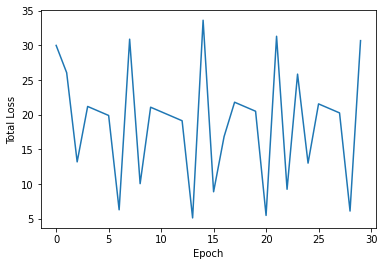

In [5]:
X = np.concatenate([w2, w3])                        # Criando conjunto de treino
y = np.concatenate([np.ones(10)*(-1), np.ones(10)]) # Considerando w1 classe 0 e w2 classe 1
perceptron_sgd_plot(X,y)

Para melhor performance do método:
 
Alogoritmo que implementa o treinamento do Perceptron de Rosenblatt com
ativação semelhante a do neurônio de McCulloch-Pitts, utilizando os dados anteriores

In [0]:
# Definindo funções :
def aprender (X, d, alpha , tol = 1e-3, limit =100) :
  '''
 Implementa o algoritmo Rosenblatt Perceptron para entrada 2D,
  com zero
  inicialização de pesadas.
  Entrada :
  X: matriz numpy de dados de treinamento
  d: etiqueta numpy array
  alfa: taxa de aprendizado
  tol: tolerância a erros
  limite: número máximo de épocas de aprendizado
  Resultado :
  w: wheights numpy array
  MSE: valores de custo de MSE, evoluindo com épocas
  data: usou dados e rótulos de treinamento como uma matriz numpy
  '' '
  '''
  MSE = [] # vetor para armazenar o MSE para cada época
  w = np. array ([1 , 0, 0]) # inicialize pesos com 1 para viés e zeros
  X_ext = np. insert (X, 0, 1, 1) # insira colunas de 1 para viés
  epoch = 0 # numero de épocas
  stop = True # boleano de parada do aprendizado
  while epoch < limit and stop :
    for i in range ( X_ext . shape [0]) :
      v = X_ext [i ,:] # seleciona os pontos de dados
      y = (np.sum (w*v) > 0). astype (int)*2 - 1 #M-P neuron classficar como 1 ou -1
      e = y - d[i] # calcule o erro de saída
      w = w - alpha *e*v # atualize os pesos
    # Calculo de custo por época atual:
    V = np.sum(w.T*X_ext , axis =1) #entradas
    Y = (V > 0). astype (int)*2 - 1 # saídas
    cost = np. mean ( (d-Y) **2 ) #MSE cost
    MSE . append ( cost ) # add cost of current epoch to MSE vector
    if cost < tol: #the algorithm converged
      stop = False # end learning loop
      epoch += 1
      data = np. concatenate ([X, d. reshape ( -1 ,1)], axis =1)
      return w, MSE , data

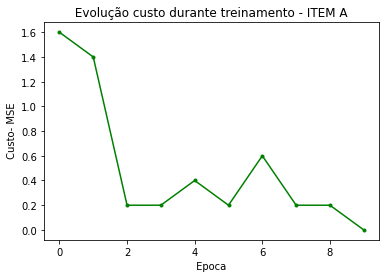

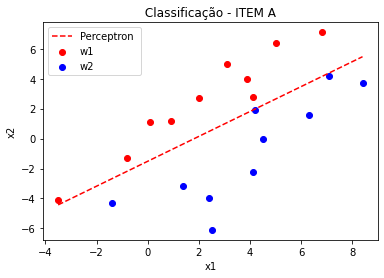

In [50]:
X = np. concatenate ([w1 , w2 ]) # criando nosso vetor de entrada
ones = np. ones (10)
d = np. concatenate ([ -1* ones , ones ]) # label do vetor : w1 > class -1 and w2 > 1
alpha = 0.2 # coeficiente de aprendizado é 0.2
w, MSE , data = aprender (X, d, alpha ) # treinamento
# Plotagem da evolução de custo :
plt.figure (1)
plt.plot (np. arange (len( MSE )), MSE , marker ='.', c='green')
plt.xlabel (" Epoca ")
plt.ylabel (" Custo- MSE")
plt.title (" Evolução custo durante treinamento - ITEM A ")
plt.show ()
# Plotagem das classes :
x1 = [ data [: ,0]. min () , data [: ,0]. max ()]
x2 = [(-w [0] - w [1]* x1 [0]) /w[2] , (-w[0] - w [1]* x1 [1]) /w [2]]
plt.figure (2)
plt.scatter ( data [:10 ,0] , data [:10 ,1] , c= 'red', label ='w1')
plt.scatter ( data [10: ,0] , data [10: ,1] , c= 'blue' , label ='w2')
plt.plot (x1 , x2 , c ='red', label ='Perceptron ', linestyle ='dashed', alpha =1.0)
plt.title (" Classificação - ITEM A ")
plt.xlabel ("x1")
plt.ylabel ("x2")
plt.legend ()
plt.show ()

Foram necessárias 10 iterações para o algoritmo convergir

Item B- De forma análoga, efetua-se com outros dados

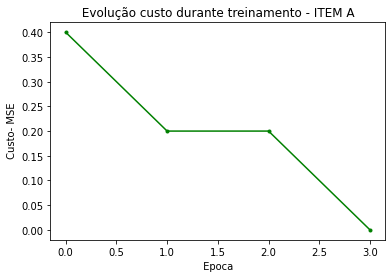

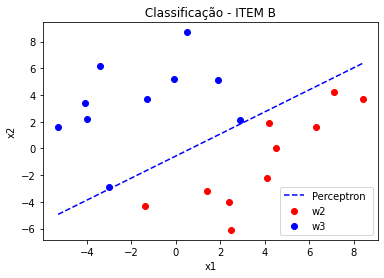

In [53]:
X = np. concatenate ([w2 , w3]) # criando nosso vetor de entrada
ones = np. ones (10)
d = np. concatenate ([ -1* ones , ones ]) # label do vetor : w2 > class -1 and w3 > 1
alpha = 0.2 # coeficiente de aprendizado é 0.2
w, MSE , data = aprender (X, d, alpha ) # treinamento
# Plotagem da evolução de custo :
plt.figure (1)
plt.plot (np. arange (len( MSE )), MSE , marker ='.', c='green')
plt.xlabel (" Epoca ")
plt.ylabel (" Custo- MSE")
plt.title (" Evolução custo durante treinamento - ITEM A ")
plt.show ()
# Plotagem das classes :
x1 = [ data [: ,0]. min () , data [: ,0]. max ()]
x2 = [(-w [0] - w [1]* x1 [0]) /w[2] , (-w[0] - w [1]* x1 [1]) /w [2]]
plt.figure (2)
plt.scatter ( data [:10 ,0] , data [:10 ,1] , c= 'red', label ='w2')
plt.scatter ( data [10: ,0] , data [10: ,1] , c= 'blue' , label ='w3')
plt.plot (x1 , x2 , c ='blue', label ='Perceptron ', linestyle ='dashed', alpha =1.0)
plt.title (" Classificação - ITEM B ")
plt.xlabel ("x1")
plt.ylabel ("x2")
plt.legend ()
plt.show ()


Nesse caso, foram necessárias 4 iterações

A diferença de número de iterações para convergir pode ser melhor visualizada ao plotar a função discriminante que é obtida pelo  perceptron. 
os pontos das duas classes estão bastante próximos, forçando
o algoritmo a ajustar a reta neste espaço menor/com mais dificuldade. 

Já no caso do item B , os pontos das duas classes estão mais distantes, deixando um espaço maior para o perceptron ajustar a curva discriminante, sendo assim mais fácil o ajuste. Por isso, no item A foram necessárias mais iterações para o treinamento do que no item B.